<a href="https://colab.research.google.com/github/slarkdev/AnomaliesDetection/blob/main/anomaly_detection_lstm_lesly_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print(f"Memoria disponible: {ram_gb:.1f} GB")


Memoria disponible: 359.2 GB


In [ ]:
!pip install --ignore-installed --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 k

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [548]:
import os
import pandas as pd

# Definir la carpeta principal que contiene las 9 carpetas
directorio_principal = "./drive/MyDrive/3w-dataset-reales/"

# Lista para almacenar nombres de archivos encontrados
archivos_encontrados = []

# Iterar sobre las 9 carpetas dentro del directorio principal
for carpeta in os.listdir(directorio_principal):
    ruta_carpeta = os.path.join(directorio_principal, carpeta)

    if os.path.isdir(ruta_carpeta) and "3" not in carpeta and "4" not in carpeta:
        # Buscar archivos dentro de la carpeta que comiencen con 'WELL-0000' y tengan extensión .csv
        archivos = [f for f in os.listdir(ruta_carpeta) if f.startswith("WELL-00002") and f.endswith(".csv")]

        # Guardar archivos con su ruta completa
        archivos_encontrados.extend([os.path.join(ruta_carpeta, f) for f in archivos])

# Convertir la lista en un DataFrame de Pandas
df_archivos = pd.DataFrame(archivos_encontrados, columns=["Ruta de Archivo"])

df_archivos



,Ruta de Archivo
0,./drive/MyDrive/3w-dataset-reales/6/WELL-00002...
1,./drive/MyDrive/3w-dataset-reales/6/WELL-00002...
2,./drive/MyDrive/3w-dataset-reales/6/WELL-00002...
3,./drive/MyDrive/3w-dataset-reales/2/WELL-00002...
4,./drive/MyDrive/3w-dataset-reales/0/WELL-00002...
...,...
210,./drive/MyDrive/3w-dataset-reales/0/WELL-00002...
211,./drive/MyDrive/3w-dataset-reales/0/WELL-00002...
212,./drive/MyDrive/3w-dataset-reales/0/WELL-00002...
213,./drive/MyDrive/3w-dataset-reales/0/WELL-00002...


In [557]:
# Inicializar lista para almacenar los DataFrames de cada archivo
dataframes = []

# Iterar sobre cada ruta en df_archivos y leer el CSV
for ruta in df_archivos["Ruta de Archivo"]:
    df = pd.read_csv(ruta, parse_dates=['timestamp'], index_col='timestamp')  # Leer CSV
    dataframes.append(df)  # Guardar en la lista

# Concatenar todos los DataFrames en uno solo
df_unido = pd.concat(dataframes, ignore_index=False)

# Mostrar las primeras filas del DataFrame combinado
df_unido


,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,
2014-03-01 15:17:00,0.0,13021140.0,119.0886,1915686.0,84.26860,4767926.0,NaN,0.0,0.0
2014-03-01 15:17:01,0.0,13021180.0,119.0888,1915681.0,84.26859,4767950.0,NaN,0.0,0.0
2014-03-01 15:17:02,0.0,13021220.0,119.0890,1915677.0,84.26859,4767974.0,NaN,0.0,0.0
2014-03-01 15:17:03,0.0,13021260.0,119.0892,1915673.0,84.26858,4767998.0,NaN,0.0,0.0
2014-03-01 15:17:04,0.0,13021300.0,119.0894,1915668.0,84.26857,4768021.0,NaN,0.0,0.0


In [558]:
# 🔍 Verificar valores faltantes
print(df_unido.isnull().sum())
df_unido['class'].value_counts()

P-PDG             489
P-TPT             489
T-TPT             489
P-MON-CKP         490
T-JUS-CKP         490
P-JUS-CKGL        490
T-JUS-CKGL    3726807
QGL               490
class             656
dtype: int64


,count
class,
0.0,3694458
6.0,12427
101.0,6570
102.0,5096
106.0,4461
1.0,2929
2.0,210


# Exploracion de Datos

In [675]:
# Definir el directorio donde buscar los archivos
directorio = "./drive/MyDrive/3w-dataset/6"

# Obtener lista de archivos que comienzan con 'well_'
archivos = [f for f in os.listdir(directorio) if f.startswith("WELL-00002") and f.endswith(".csv")  ]

# Crear un DataFrame con los nombres de los archivos encontrados
df_archivos = pd.DataFrame( archivos, columns=["Nombre de Archivo"])

# Mostrar el DataFrame
df_archivos


,Nombre de Archivo
0,WELL-00002_20140301151700.csv
1,WELL-00002_20140325170304.csv
2,WELL-00002_20140212170333.csv


In [676]:
# 🔄 Inicializar lista para almacenar los DataFrames de cada archivo
dataframes = []

carpeta = "./drive/MyDrive/3w-dataset/6/"
# Iterar sobre cada ruta en df_archivos y leer el CSV
for ruta in df_archivos["Nombre de Archivo"]:

    path = carpeta + ruta
    print(path)
    df = pd.read_csv(path, parse_dates=['timestamp'], index_col='timestamp')  # 📥 Leer CSV
    dataframes.append(df)  # 🔄 Guardar en la lista

# 🔄 Concatenar todos los DataFrames en uno solo
df_unido = pd.concat(dataframes, ignore_index=False)
df_unido = df_unido.sort_values(by = 'timestamp')
# 📊 Mostrar las primeras filas del DataFrame combinado
df_unido


./drive/MyDrive/3w-dataset/6/WELL-00002_20140301151700.csv
./drive/MyDrive/3w-dataset/6/WELL-00002_20140325170304.csv
./drive/MyDrive/3w-dataset/6/WELL-00002_20140212170333.csv


,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,
2014-02-12 17:03:33,0.0,12804630.0,118.7102,2514857.0,83.49664,4802594.0,NaN,0.0,0.0
2014-02-12 17:03:34,0.0,12804800.0,118.7104,2514857.0,83.49661,4802581.0,NaN,0.0,0.0
2014-02-12 17:03:35,0.0,12804970.0,118.7106,2514857.0,83.49659,4802568.0,NaN,0.0,0.0
2014-02-12 17:03:36,0.0,12805130.0,118.7108,2514856.0,83.49656,4802555.0,NaN,0.0,0.0
2014-02-12 17:03:37,0.0,12805300.0,118.7110,2514856.0,83.49654,4802542.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2014-03-25 20:23:20,0.0,14055750.0,118.5514,4591160.0,80.85170,4800835.0,NaN,0.0,6.0
2014-03-25 20:23:21,0.0,14055830.0,118.5513,4591190.0,80.85181,4800767.0,NaN,0.0,6.0
2014-03-25 20:23:22,0.0,14055910.0,118.5511,4591219.0,80.85191,4800699.0,NaN,0.0,6.0


In [677]:
# 🔍 Verificar valores faltantes
print(df_unido.isnull().sum())
df_unido['class'].value_counts()

P-PDG             0
P-TPT             0
T-TPT             0
P-MON-CKP         0
T-JUS-CKP         0
P-JUS-CKGL        0
T-JUS-CKGL    47869
QGL               0
class           483
dtype: int64


,count
class,
0.0,30498
6.0,12427
106.0,4461


In [680]:
def crearGraficos(TimeSeries):

  plt.figure(figsize=(8, 3))
  plt.plot(TimeSeries['P-PDG'], label='P-PDG')
  plt.legend();

  plt.figure(figsize=(8, 3))
  plt.plot(TimeSeries['P-TPT'], label='P-TPT')
  plt.legend();

  plt.figure(figsize=(8, 3))
  plt.plot(TimeSeries['T-TPT'], label='T-TPT')
  plt.legend();

  plt.figure(figsize=(8, 3))
  plt.plot(TimeSeries['P-MON-CKP'], label='P-MON-CKP')
  plt.legend();

  plt.figure(figsize=(8, 3))
  plt.plot(TimeSeries['T-JUS-CKP'], label='T-JUS-CKP')
  plt.legend();

  plt.figure(figsize=(8, 3))
  plt.plot(TimeSeries['P-JUS-CKGL'], label='P-JUS-CKGL')
  plt.legend();

  plt.figure(figsize=(8, 3))
  plt.plot(TimeSeries['T-JUS-CKGL'], label='T-JUS-CKGL')
  plt.legend();

  plt.figure(figsize=(8, 3))
  plt.plot(TimeSeries['QGL'], label='QGL')
  plt.legend();


In [681]:
crearGraficos(df_unido)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

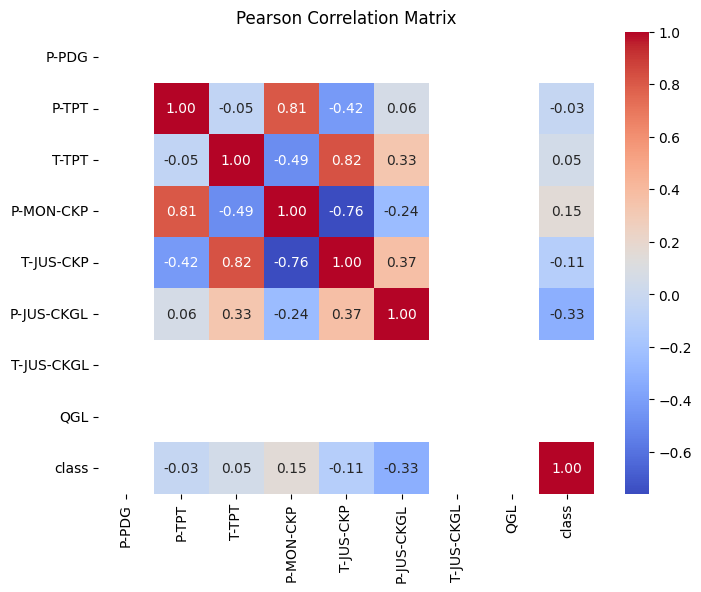

In [679]:
# 📌 Calcular la matriz de correlación de Pearson
corr_matrix = df_unido.corr(method='pearson')

# 🚀 Visualización con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()


# Limpieza de datos

In [682]:
df = df_unido
df

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,
2014-02-12 17:03:33,0.0,12804630.0,118.7102,2514857.0,83.49664,4802594.0,NaN,0.0,0.0
2014-02-12 17:03:34,0.0,12804800.0,118.7104,2514857.0,83.49661,4802581.0,NaN,0.0,0.0
2014-02-12 17:03:35,0.0,12804970.0,118.7106,2514857.0,83.49659,4802568.0,NaN,0.0,0.0
2014-02-12 17:03:36,0.0,12805130.0,118.7108,2514856.0,83.49656,4802555.0,NaN,0.0,0.0
2014-02-12 17:03:37,0.0,12805300.0,118.7110,2514856.0,83.49654,4802542.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2014-03-25 20:23:20,0.0,14055750.0,118.5514,4591160.0,80.85170,4800835.0,NaN,0.0,6.0
2014-03-25 20:23:21,0.0,14055830.0,118.5513,4591190.0,80.85181,4800767.0,NaN,0.0,6.0
2014-03-25 20:23:22,0.0,14055910.0,118.5511,4591219.0,80.85191,4800699.0,NaN,0.0,6.0


In [683]:
df = df.drop ('P-PDG', axis = 1)
df = df.drop ('T-JUS-CKGL', axis = 1)
df = df.drop ('QGL', axis = 1)

# para anomalia 1 y 2
#df = df.drop ('T-JUS-CKP', axis = 1)

In [684]:
from sklearn.preprocessing import MinMaxScaler

df = df.dropna()

df.loc[df['class'] != 0.0, 'class'] = 1
df.loc[df['class'] == 0.0, 'class'] = 0

df = df.sort_values(by = 'timestamp')

# Separar la columna timestamp
timestamps = df.index  # Guardar fechas

scaler = MinMaxScaler()
df = scaler.fit_transform(df)


<ipython-input-684-6678af2da6a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['class'] != 0.0, 'class'] = 1
<ipython-input-684-6678af2da6a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['class'] == 0.0, 'class'] = 0


In [685]:
#df = pd.DataFrame(df, columns= ['P-PDG', 'P-TPT',	'T-TPT','P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class'], index= timestamps)

df = pd.DataFrame(df, columns= [ 'P-TPT',	'T-TPT','P-MON-CKP',  'T-JUS-CKP','P-JUS-CKGL', 'class'], index= timestamps)

df.index.name= 'timestamp'

df

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,class
timestamp,,,,,,
2014-02-12 17:03:33,0.147457,0.356723,0.299044,0.774090,0.875931,0.0
2014-02-12 17:03:34,0.147572,0.357025,0.299044,0.774081,0.875910,0.0
2014-02-12 17:03:35,0.147688,0.357326,0.299044,0.774075,0.875889,0.0
2014-02-12 17:03:36,0.147797,0.357627,0.299044,0.774066,0.875867,0.0
2014-02-12 17:03:37,0.147913,0.357928,0.299044,0.774061,0.875846,0.0
...,...,...,...,...,...,...
2014-03-25 20:23:20,0.999782,0.117603,0.999960,0.000061,0.873050,1.0
2014-03-25 20:23:21,0.999837,0.117452,0.999970,0.000094,0.872939,1.0
2014-03-25 20:23:22,0.999891,0.117151,0.999980,0.000123,0.872827,1.0


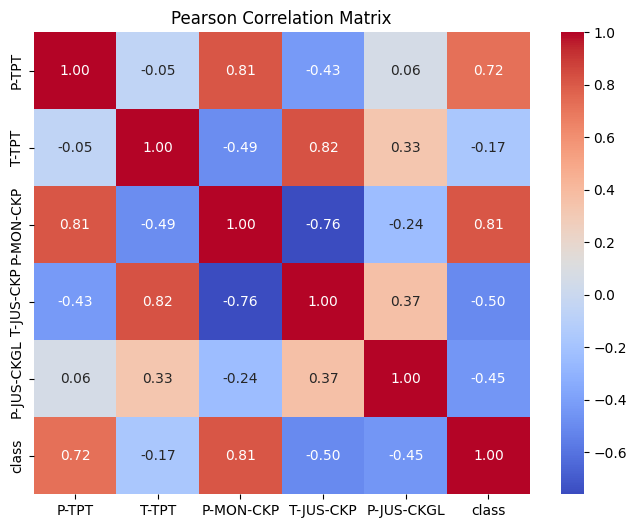

In [686]:
# 📌 Calcular la matriz de correlación de Pearson
corr_matrix = df.corr(method='pearson')

# 🚀 Visualización con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()


In [687]:
df['class'].value_counts()

,count
class,
0.0,30498
1.0,16888


In [601]:
# obtenemos 230000 datos de dataset-0 para el train:
df_train = df.iloc[:223000]  # 🔄 Extraer los primeros 230,000 registros sin alterar el orden
df_train

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,class
timestamp,,,,,,
2013-12-11 23:00:15,0.998766,0.668012,0.967624,1.000000,0.591835,0.0
2013-12-11 23:00:16,0.998757,0.667947,0.967581,1.000000,0.591822,0.0
2013-12-11 23:00:17,0.998749,0.667860,0.967538,1.000000,0.591810,0.0
2013-12-11 23:00:18,0.998741,0.667795,0.967495,1.000000,0.591798,0.0
2013-12-11 23:00:19,0.998731,0.667730,0.967452,1.000000,0.591785,0.0
...,...,...,...,...,...,...
2017-02-11 10:18:43,0.068794,0.593010,0.114767,0.032128,0.016705,0.0
2017-02-11 10:18:44,0.068811,0.593075,0.112556,0.031791,0.016705,0.0
2017-02-11 10:18:45,0.068827,0.593162,0.110345,0.031454,0.016705,0.0


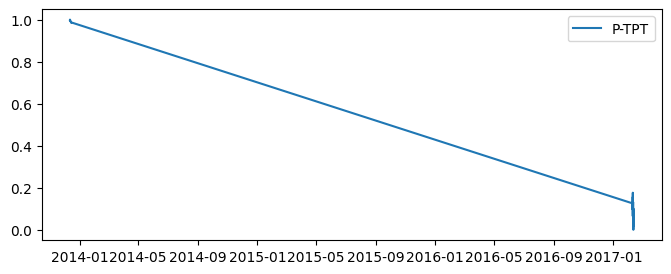

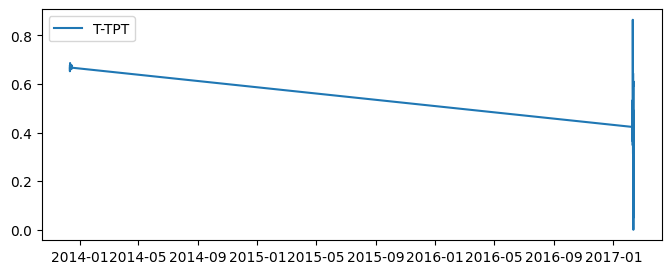

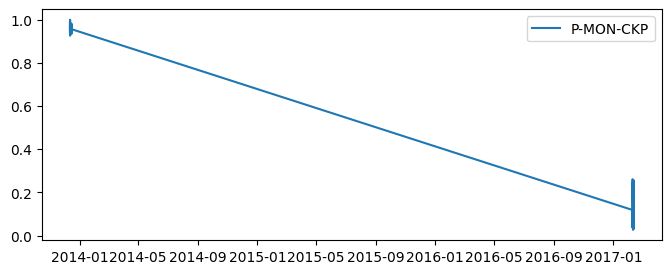

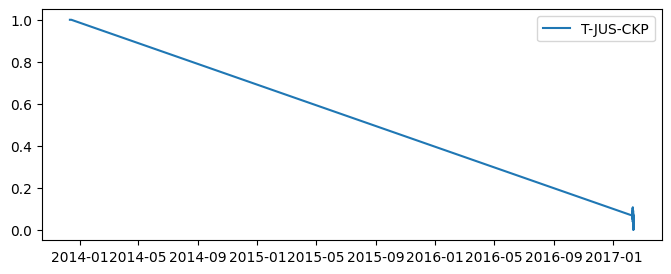

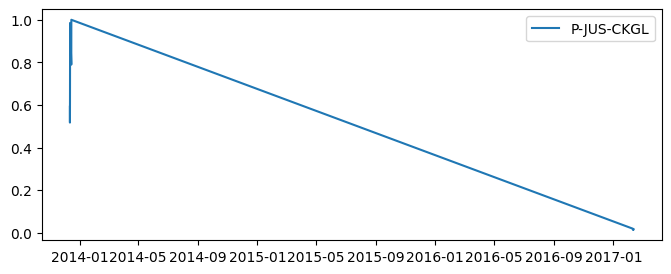

In [602]:
plt.figure(figsize=(8, 3))
plt.plot(df_train['P-TPT'], label='P-TPT')
plt.legend();

plt.figure(figsize=(8, 3))
plt.plot(df_train['T-TPT'], label='T-TPT')
plt.legend();

plt.figure(figsize=(8, 3))
plt.plot(df_train['P-MON-CKP'], label='P-MON-CKP')
plt.legend();

plt.figure(figsize=(8, 3))
plt.plot(df_train['T-JUS-CKP'], label='T-JUS-CKP')
plt.legend();

plt.figure(figsize=(8, 3))
plt.plot(df_train['P-JUS-CKGL'], label='P-JUS-CKGL')
plt.legend();


In [688]:
# Guardamos el dataset
ruta_guardado = "/content/drive/MyDrive/3w-dataset-train-test/dataset-test-06.csv"

# 🚀 Guardar el DataFrame en Google Drive
df.to_csv(ruta_guardado, index=True)

# ✅ Confirmación de guardado
print(f"Archivo guardado en: {ruta_guardado}")


Archivo guardado en: /content/drive/MyDrive/3w-dataset-train-test/dataset-test-06.csv


# ** Configuracion y Aplicacion del Modelo **

In [693]:
# 🔥 Especificar las rutas de los archivos en Google Drive
ruta_dataset0 = "/content/drive/MyDrive/3w-dataset-train-test/dataset-train.csv"

ruta_csv1 = "/content/drive/MyDrive/3w-dataset-train-test/dataset-test-01.csv"
ruta_csv2 = "/content/drive/MyDrive/3w-dataset-train-test/dataset-test-02.csv"
ruta_csv3 = "/content/drive/MyDrive/3w-dataset-train-test/dataset-test-06.csv"

df0 = pd.read_csv(ruta_dataset0, parse_dates=['timestamp'], index_col='timestamp')
# Leer los CSV en DataFrames
df1 = pd.read_csv(ruta_csv1, parse_dates=['timestamp'], index_col='timestamp')
df2 = pd.read_csv(ruta_csv2, parse_dates=['timestamp'], index_col='timestamp')
df3 = pd.read_csv(ruta_csv3, parse_dates=['timestamp'], index_col='timestamp')

df_unido = pd.concat([df1, df2, df3], ignore_index=False)

# Mostrar las primeras filas del DataFrame combinado
df_unido

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,class
timestamp,,,,,,
2014-01-26 20:00:50,0.995514,0.032099,0.990271,0.000000,1.000000,0.0
2014-01-26 20:00:51,0.995529,0.032034,0.990280,0.000000,0.999811,0.0
2014-01-26 20:00:52,0.995544,0.031968,0.990288,0.000000,0.999615,0.0
2014-01-26 20:00:53,0.995554,0.031902,0.990297,0.000000,0.999426,0.0
2014-01-26 20:00:54,0.995569,0.031837,0.990305,0.000000,0.999230,0.0
...,...,...,...,...,...,...
2014-03-25 20:23:20,0.999782,0.117603,0.999960,0.000061,0.873050,1.0
2014-03-25 20:23:21,0.999837,0.117452,0.999970,0.000094,0.872939,1.0
2014-03-25 20:23:22,0.999891,0.117151,0.999980,0.000123,0.872827,1.0


In [691]:
df3

,timestamp,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,class
0,2014-02-12 17:03:33,0.147457,0.356723,0.299044,0.774090,0.875931,0.0
1,2014-02-12 17:03:34,0.147572,0.357025,0.299044,0.774081,0.875910,0.0
2,2014-02-12 17:03:35,0.147688,0.357326,0.299044,0.774075,0.875889,0.0
3,2014-02-12 17:03:36,0.147797,0.357627,0.299044,0.774066,0.875867,0.0
4,2014-02-12 17:03:37,0.147913,0.357928,0.299044,0.774061,0.875846,0.0
...,...,...,...,...,...,...,...
47381,2014-03-25 20:23:20,0.999782,0.117603,0.999960,0.000061,0.873050,1.0
47382,2014-03-25 20:23:21,0.999837,0.117452,0.999970,0.000094,0.872939,1.0
47383,2014-03-25 20:23:22,0.999891,0.117151,0.999980,0.000123,0.872827,1.0
47384,2014-03-25 20:23:23,0.999946,0.117000,0.999990,0.000155,0.872716,1.0


In [579]:
# Definir las columnas de entrada y salida:
input_columns = ['P-TPT',	'T-TPT','P-MON-CKP', 'T-JUS-CKP','P-JUS-CKGL',]
output_columns = ['class']

In [580]:
columns_names = df.columns.values
columns_names

array(['P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'class'],
      dtype=object)

In [694]:
train = df0
test = df_unido

In [695]:
train

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,class
timestamp,,,,,,
2013-12-11 23:00:15,0.998766,0.668012,0.967624,1.000000,0.591835,0.0
2013-12-11 23:00:16,0.998757,0.667947,0.967581,1.000000,0.591822,0.0
2013-12-11 23:00:17,0.998749,0.667860,0.967538,1.000000,0.591810,0.0
2013-12-11 23:00:18,0.998741,0.667795,0.967495,1.000000,0.591798,0.0
2013-12-11 23:00:19,0.998731,0.667730,0.967452,1.000000,0.591785,0.0
...,...,...,...,...,...,...
2017-02-11 10:18:43,0.068794,0.593010,0.114767,0.032128,0.016705,0.0
2017-02-11 10:18:44,0.068811,0.593075,0.112556,0.031791,0.016705,0.0
2017-02-11 10:18:45,0.068827,0.593162,0.110345,0.031454,0.016705,0.0


In [ ]:
#from sklearn.model_selection import train_test_split

#train, test = train_test_split(df, test_size=0.3, shuffle=False)
#train

,P-PDG,P-TPT,T-TPT,class
timestamp,,,,
2013-11-04 01:41:01,0.000000,0.709619,0.999519,0.0
2013-11-04 01:41:02,0.000000,0.709619,0.999518,0.0
2013-11-04 01:41:03,0.000000,0.709619,0.999518,0.0
2013-11-04 01:41:04,0.000000,0.709619,0.999517,0.0
2013-11-04 01:41:05,0.000000,0.709619,0.999517,0.0
...,...,...,...,...
2014-11-22 22:01:25,0.818476,0.605352,0.965871,0.0
2014-11-22 22:01:26,0.818472,0.605356,0.965864,0.0
2014-11-22 22:01:27,0.818468,0.605359,0.965857,0.0


In [696]:
test

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,class
timestamp,,,,,,
2014-01-26 20:00:50,0.995514,0.032099,0.990271,0.000000,1.000000,0.0
2014-01-26 20:00:51,0.995529,0.032034,0.990280,0.000000,0.999811,0.0
2014-01-26 20:00:52,0.995544,0.031968,0.990288,0.000000,0.999615,0.0
2014-01-26 20:00:53,0.995554,0.031902,0.990297,0.000000,0.999426,0.0
2014-01-26 20:00:54,0.995569,0.031837,0.990305,0.000000,0.999230,0.0
...,...,...,...,...,...,...
2014-03-25 20:23:20,0.999782,0.117603,0.999960,0.000061,0.873050,1.0
2014-03-25 20:23:21,0.999837,0.117452,0.999970,0.000094,0.872939,1.0
2014-03-25 20:23:22,0.999891,0.117151,0.999980,0.000123,0.872827,1.0


In [697]:
# Definir una función para crear secuencias de longitud sequence_length
def create_sequences(data, sequence_length):
 X = []
 y = []
 for i in range(len(data) - sequence_length):
    X.append(data.iloc[i:i+sequence_length][input_columns].values)
    y.append(data.iloc[i+sequence_length][output_columns].values)
 return np.array(X), np.array(y)

In [698]:
VentanaTiempo = 300 # segun tipo de anomalia, Anomalia 01:12 horas, anomalia 02: 5-20 minutos, anomalia 06: 15 minutos

# reshape to [samples, time_steps, n_features]
# Crear secuencias de entrenamiento
X_train, y_train = create_sequences(train, VentanaTiempo)
X_test, y_test = create_sequences(test, VentanaTiempo)

#X_t=X_train.reshape(851,30)
print(X_train.shape)
print(X_test.shape)

(222700, 300, 5)
(66785, 300, 5)


In [701]:
X_train.shape

(222700, 300, 5)

In [699]:
X_test.shape

(66785, 300, 5)

In [ ]:
df["timestamp"] = df.index.astype(int) / 10**9  # Convertir datetime a segundos
df = df.reset_index(drop=True)  # Restaurar el índice numérico

In [702]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

columnas_serie_temporal = 5
input_layer = keras.Input(shape=(VentanaTiempo, columnas_serie_temporal))

# Codificador
encoder = keras.layers.LSTM(64, return_sequences=True, dropout=0.2)(input_layer)
encoder = keras.layers.LSTM(32, return_sequences=False, dropout=0.2)(encoder)

# Clasificador
classifier = keras.layers.Dense(32, activation="relu", kernel_regularizer=l2(0.01))(encoder)
classifier = keras.layers.Dense(1, activation="sigmoid")(classifier)  # Clasificación de anomalías

# Modelo
model = keras.Model(inputs=input_layer, outputs=classifier)

optimizer = Adam(learning_rate=0.0005)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-5)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy', 'precision', 'recall', 'f1_score'])


In [ ]:
model = keras.Sequential()

neuronas = 128
columnas_serie_temporal = 5

# add the first layer of LSTM and dropout regularization
model.add(keras.layers.LSTM(units= neuronas, return_sequences = True, input_shape = (VentanaTiempo, columnas_serie_temporal )))

model.add(keras.layers.LSTM(units= 64, return_sequences = True))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.LSTM(units= 64, return_sequences = True))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.LSTM(units= 64))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(units = 1, activation='relu'))

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['accuracy', 'precision', 'recall', 'f1_score'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [703]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 5)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 300, 64)        │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,425 (122.75 KB)

 Trainable params: 31,425 (122.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
3480/3480 ━━━━━━━━━━━━━━━━━━━━ 868s 248ms/step - accuracy: 1.0000 - f1_score: 0.0000e+00 - loss: 0.0949 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5254 - val_f1_score: 0.6437 - val_loss: 4.4143 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
3480/3480 ━━━━━━━━━━━━━━━━━━━━ 854s 245ms/step - accuracy: 1.0000 - f1_score: 0.0000e+00 - loss: 8.1067e-05 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5254 - val_f1_score: 0.6437 - val_loss: 5.9548 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
3480/3480 ━━━━━━━━━━━━━━━━━━━━ 886s 255ms/step - accuracy: 1.0000 - f1_score: 0.0000e+00 - loss: 2.2587e-06 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5254 - val_f1_score: 0.6437 - val_loss: 7.0105 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
3480/3480 ━━━━━━━━━━━━━━━━━━━━ 869s 250ms/step - accuracy: 1.0000 - f1_score: 0.0000e+00 - loss: 2.5605e-07 - precision: 0.0000e+00 - recall: 0.000

In [ ]:
model.save('/content/drive/My Drive/3w-dataset-train-test/entrenamientos/modelo_lstm_e10_bs_64.h5')

In [ ]:
import pickle

ruta_drive = '/content/drive/My Drive/3w-dataset-train-test/entrenamientos/modelo_lstm_e10_bs_64.pkl'  # Ruta en Google Drive

# Guardar el history en la ruta específica
with open(ruta_drive, "wb") as f:
    pickle.dump(history.history, f)

print("Historial guardado correctamente en:", ruta_drive)


Historial guardado correctamente en: /content/drive/My Drive/history_lstm_35_bs_64_acc_95.pkl


In [ ]:
from tensorflow.keras.models import load_model

# Cargar modelo guardado
modelo_cargado = load_model('/content/drive/My Drive/3w-dataset-train-test/entrenamientos/modelo_lstm_e10_bs_64.h5')

# Confirmar que el modelo se ha cargado
modelo_cargado.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 300, 128)       │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 300, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 300, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,107 (715.27 KB)

 Trainable params: 183,105 (715.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
with open(ruta_drive, "rb") as f:
    history_cargado = pickle.load(f)

print("Métricas guardadas:", history_cargado.keys())  # Ver qué datos están disponibles


Métricas guardadas: dict_keys(['accuracy', 'f1_score', 'loss', 'precision', 'recall', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision', 'val_recall'])


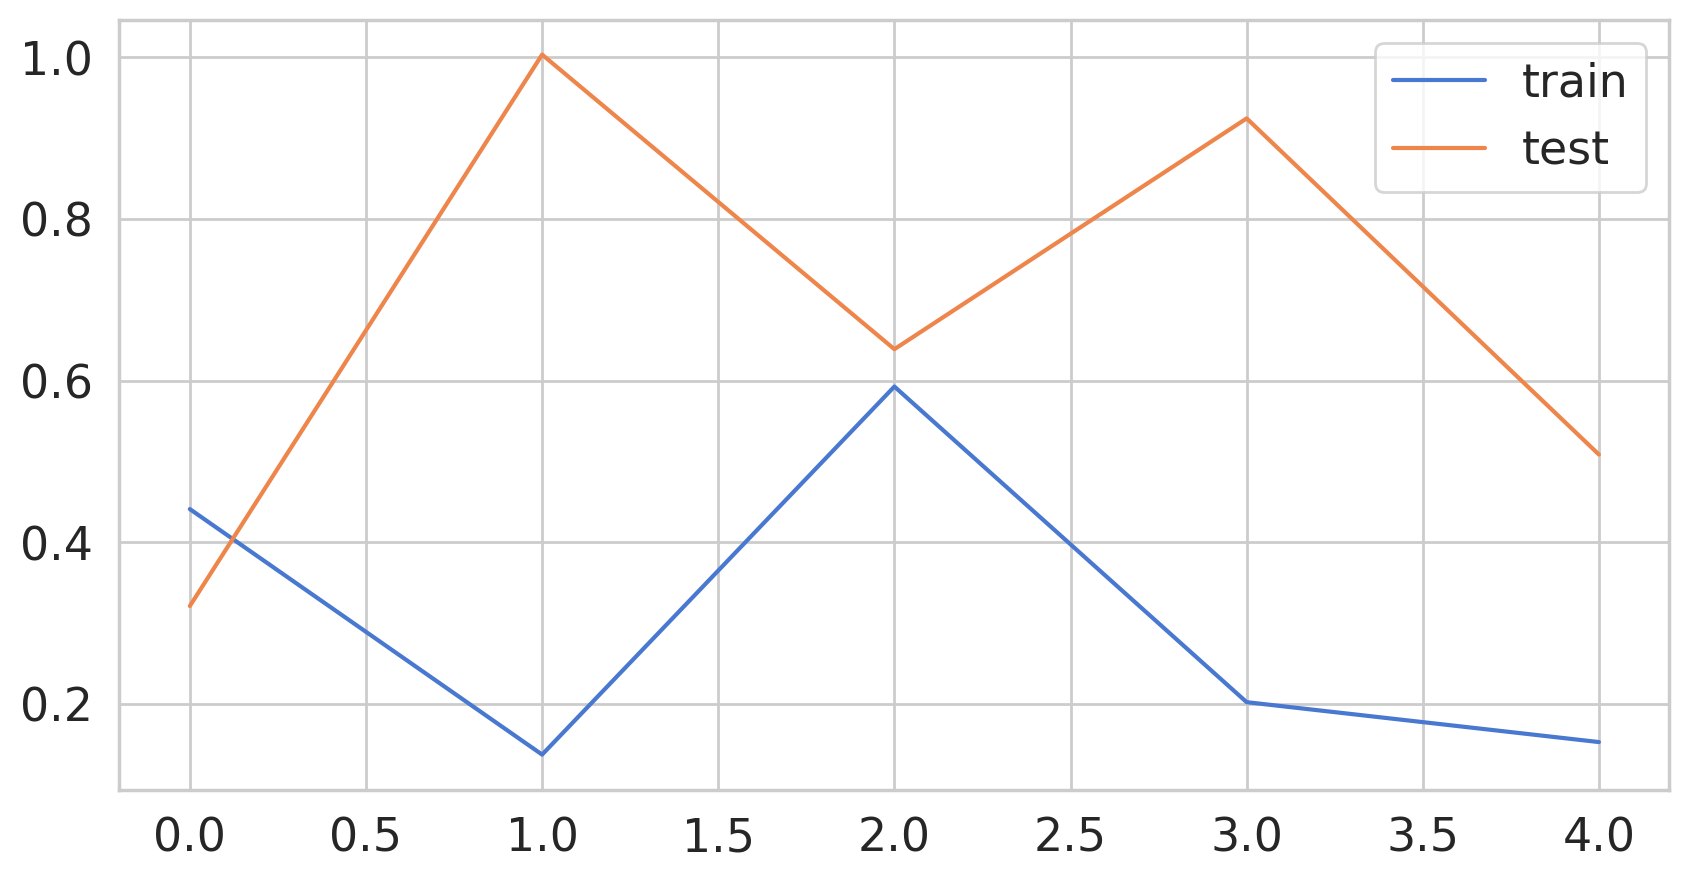

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history_cargado['loss'], label='train')
plt.plot(history_cargado['val_loss'], label='test')
plt.legend();

In [ ]:
loss, accuracy, precision, recall, f1_score = modelo_cargado.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')
print(f'Test f1_score: {f1_score}')

1463/1463 ━━━━━━━━━━━━━━━━━━━━ 247s 168ms/step - accuracy: 0.5971 - f1_score: 0.7600 - loss: 0.5419 - precision_2: 0.9005 - recall_2: 0.3464
Test loss: 0.5085037350654602
Test accuracy: 0.6170212626457214
Test precision: 0.9978359937667847
Test recall: 0.41903865337371826
Test f1_score: 0.7938625812530518


# CALCULAMOS LAS ANOMALIAS IDENTIFICADAS POR EL MODELO Y LAS COMPARAMOS CON LAS REALES

In [ ]:
X_test_pred = modelo_cargado.predict(X_test)

1463/1463 ━━━━━━━━━━━━━━━━━━━━ 237s 162ms/step


In [ ]:
X_test_pred_2 = np.expand_dims(X_test_pred, axis=1)  # Agrega dimensión en la posición correcta
X_test_pred_2 = np.repeat(X_test_pred_2, X_test.shape[1], axis=1)  # Expande a 300 timesteps

X_test_pred_2 = np.tile(X_test_pred_2, (1, 3))

print("Forma de X_test:", X_test.shape)
print("Forma de X_test_pred:", X_test_pred_2.shape)

Forma de X_test: (46812, 300, 3)
Forma de X_test_pred: (46812, 300, 3)


In [ ]:
test_mae_loss = np.mean(np.abs( X_test - X_test_pred_2), axis=1)

<ipython-input-118-31ca0369e6a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_mae_loss, bins=50, kde=True);


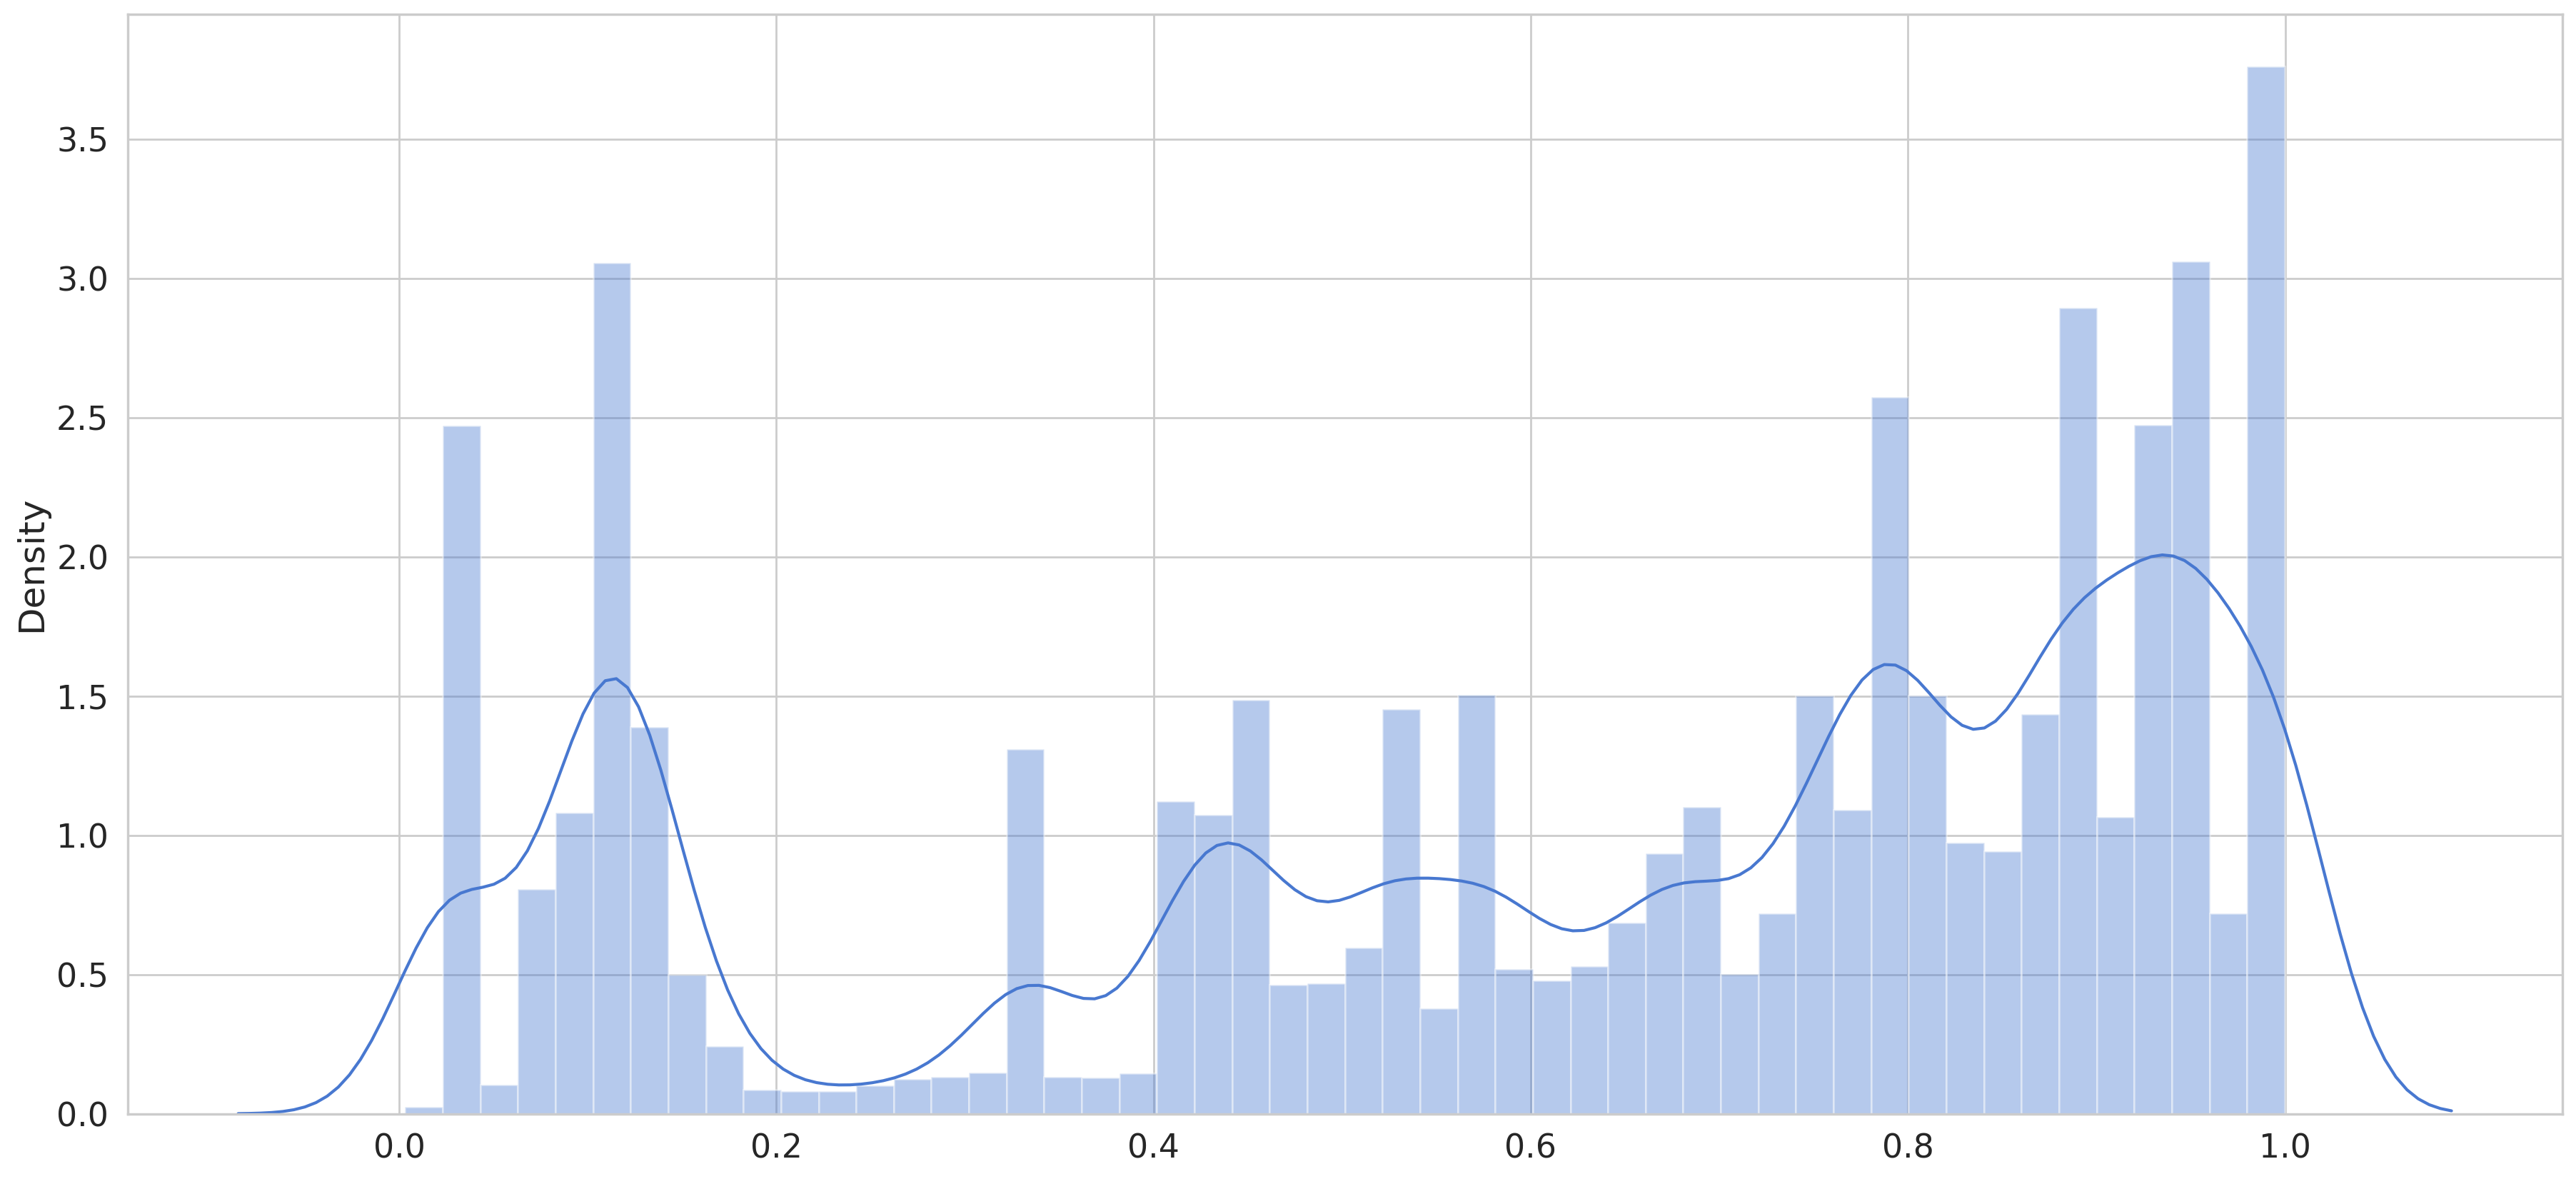

In [ ]:
sns.distplot(test_mae_loss, bins=50, kde=True);

In [ ]:
# 🚀 Revertir la escala para ver los valores originales
y_anomalias = scaler.inverse_transform(anomalies)
y_anomalias

array([[3.38656368e+07, 2.21885537e+07, 1.16832800e+02, 2.82637622e-01],
       [3.38693659e+07, 2.21885537e+07, 1.16832800e+02, 2.82513841e-01],
       [3.38730943e+07, 2.21885537e+07, 1.16832800e+02, 2.82390060e-01],
       ...,
       [3.40501630e+07, 2.21885537e+07, 1.16832800e+02, 4.83078129e-02],
       [3.40503663e+07, 2.21885537e+07, 1.16832800e+02, 9.50200727e-01],
       [3.39569955e+07, 2.21885537e+07, 1.16832800e+02, 9.50200727e-01]])